# 라이브러리 호출

In [ ]:
import pandas as pd
# pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
sns.set(style = 'whitegrid')
sns.set_palette('pastel')

# 데이터 불러오기

In [ ]:
data = pd.read_csv('무상증자data_v1.csv')
data.head(1)

,Unnamed: 0,회사명,code,Date,High,Low,Close,Volume,기관합계,개인,...,자기주식비율,베타,거래회전율,기업규모(log),증자비율,무상증자여부,Name,Market,Sector,Industry
0,0,코오롱티슈진,950160,2018-06-30,38407.5,36175.0,36943.75,412945.75,-395523201.3,574492533.8,...,0.0,1.415067,0.03358,26.842061,0.0,0,코오롱티슈진,KOSDAQ,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제


In [ ]:
data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13574 entries, 0 to 13573
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13574 non-null  int64  
 1   회사명            13574 non-null  object 
 2   code           13574 non-null  int64  
 3   Date           13574 non-null  object 
 4   High           13574 non-null  float64
 5   Low            13574 non-null  float64
 6   Close          13574 non-null  float64
 7   Volume         13574 non-null  float64
 8   기관합계           13574 non-null  float64
 9   개인             13574 non-null  float64
 10  MFI            13574 non-null  float64
 11  윌리엄R%          13574 non-null  float64
 12  RSI            13574 non-null  float64
 13  CCI            13574 non-null  float64
 14  정배열            13574 non-null  float64
 15  역배열            13574 non-null  float64
 16  OBV            13574 non-null  float64
 17  볼린저밴드위치        13574 non-null  float64
 18  소액주주보유

In [ ]:
(data == float('inf')).sum()

Unnamed: 0        0
회사명               0
code              0
Date              0
High              0
Low               0
Close             0
Volume            0
기관합계              0
개인                0
MFI               0
윌리엄R%             0
RSI               0
CCI               0
정배열               0
역배열               0
OBV               0
볼린저밴드위치           0
소액주주보유주식비율        0
최대주주_특수관계인지분율     0
유동비율             12
부채비율              0
자기자본비율            0
매출액증가율            9
영업이익증가율           0
EBITDA증가율         0
EPS증가율            0
당기순이익증가율          0
흑자전환              0
자산성장율             0
자본성장율             0
부채비율성장율           0
유동비율성장율           8
자산회전율             0
자산회전율성장율          9
부채회전율             0
자본회전율             0
영업이익율             0
EBITDA마진율         0
ROA               0
ROE               0
OP/A              0
PER               0
PSR              54
PBR               0
EV/EBITDA         0
자기주식비율            0
베타                0
거래회전율             0
기업규모(log)         0


In [ ]:
(data == '#NAME?').sum()

Unnamed: 0        0
회사명               0
code              0
Date              0
High              0
Low               0
Close             0
Volume            0
기관합계              0
개인                0
MFI               0
윌리엄R%             0
RSI               0
CCI               0
정배열               0
역배열               0
OBV               0
볼린저밴드위치           0
소액주주보유주식비율        0
최대주주_특수관계인지분율     0
유동비율              0
부채비율              0
자기자본비율            0
매출액증가율            0
영업이익증가율           0
EBITDA증가율         0
EPS증가율            0
당기순이익증가율          0
흑자전환              0
자산성장율             0
자본성장율             0
부채비율성장율           0
유동비율성장율           0
자산회전율             0
자산회전율성장율          0
부채회전율             0
자본회전율             0
영업이익율            54
EBITDA마진율        31
ROA               0
ROE               0
OP/A              0
PER               0
PSR               0
PBR               0
EV/EBITDA         0
자기주식비율            0
베타                0
거래회전율             0
기업규모(log)         0


# 데이터 전처리

In [ ]:
data.drop(['Unnamed: 0','Name'], axis = 1, inplace = True)
data.columns

In [ ]:
data.replace([np.inf, -np.inf,'#NAME?'], np.nan, inplace = True)
data.dropna(inplace = True)

In [ ]:
print((data == float('inf')).sum().sum())
print((data == '#NAME?').sum().sum())
print(data.isnull().sum().sum())

0
0
0


# 일단 ML에 때려넣어보면?


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

# K-Fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 20, random_state=1, shuffle = True)

# BaseLine 체크
from sklearn.model_selection import cross_val_score

# 오버샘플링
from imblearn.over_sampling import SMOTE

# RandomForest
from sklearn.ensemble import RandomForestClassifier 

# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

# 인코딩
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## 인코딩

In [ ]:
# 인코딩
ct = ColumnTransformer('onehot', OneHotEncoder(sparse = False),['Market'])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)
X_test

TypeError: __init__() takes 2 positional arguments but 4 were given

## 데이터셋 설정

In [ ]:
# 변수 설정
X = data.drop(['회사명', 'code', 'Date', '무상증자여부', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1)
y = data['무상증자여부']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9202, 46)
(9202,)
(3944, 46)
(3944,)


In [ ]:
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_sample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18208, 46)
(18208,)
(3944, 46)
(3944,)


## BaseLine

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 1)
scores = cross_val_score(rf, X_train, y_train, cv = kfold, scoring = 'precision')
for iter_count, acc in enumerate(scores):
    print('rf {0}번째 검증 정밀도: {1:4f}'.format(iter_count, acc))
print(scores.mean())

rf 0번째 검증 정밀도: 0.993617
rf 1번째 검증 정밀도: 0.991416
rf 2번째 검증 정밀도: 0.997872
rf 3번째 검증 정밀도: 0.995215
rf 4번째 검증 정밀도: 0.987315
rf 5번째 검증 정밀도: 0.997664
rf 6번째 검증 정밀도: 0.993521
rf 7번째 검증 정밀도: 1.000000
rf 8번째 검증 정밀도: 1.000000
rf 9번째 검증 정밀도: 1.000000
rf 10번째 검증 정밀도: 1.000000
rf 11번째 검증 정밀도: 0.997826
rf 12번째 검증 정밀도: 0.993534
rf 13번째 검증 정밀도: 0.993421
rf 14번째 검증 정밀도: 0.997792
rf 15번째 검증 정밀도: 0.986667
rf 16번째 검증 정밀도: 0.991228
rf 17번째 검증 정밀도: 0.997706
rf 18번째 검증 정밀도: 0.992908
rf 19번째 검증 정밀도: 0.997854
0.9952778608205541


## RandomForest

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, rf.predict(X_test)))

정확도: 0.9898580121703854
재현율: 0.4
정밀도*: 0.5
f1: 0.4444444444444445
roc: 0.6979508196721311
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3904
           1       0.50      0.40      0.44        40

    accuracy                           0.99      3944
   macro avg       0.75      0.70      0.72      3944
weighted avg       0.99      0.99      0.99      3944



# EDA

## 상관관계

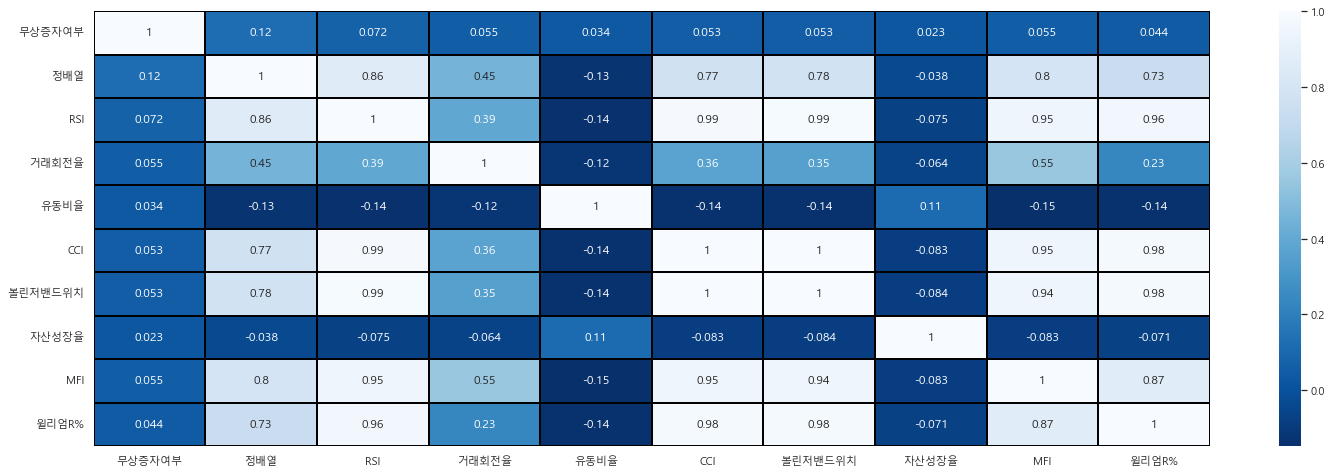

In [ ]:
plt.figure(figsize=(25,8))

num_data = data.drop(['회사명', 'code', 'Date', 'Market', 'Sector', 'Industry', '증자비율'], axis = 1)
corr = num_data.corr()

num = 10
col = corr.nlargest(num, '무상증자여부')['무상증자여부'].index
coeff = np.corrcoef(corr[col].values.T)
plt.rcParams['font.family'] = 'Malgun Gothic'
# heatmap
heatmp = sns.heatmap(coeff, 
                     annot = True, 
                     xticklabels = col.values, yticklabels = col.values, 
                     linewidth=2,cmap='Blues_r', linecolor='black')

# t-test

In [ ]:
import scipy as sp

In [ ]:
ts = data[['정배열', 'RSI', '거래회전율', '유동비율', 'CCI', '볼린저밴드위치', '자산성장율', 'MFI', '윌리엄R%']]

for t in ts:
    print(t,":", sp.stats.ttest_ind(data[data['무상증자여부']==1][t], data[data['무상증자여부']==0][t], equal_var = False).pvalue)

정배열 : 3.7525259411559593e-13
RSI : 1.3835125269482544e-08
거래회전율 : 0.04195955770793272
유동비율 : 0.004296587515667852
CCI : 0.00010610802850065898
볼린저밴드위치 : 0.0002708349725569015
자산성장율 : 0.0034514756061795496
MFI : 0.00026008633548404075
윌리엄R% : 0.01636810119705279


# 상관계수가 높은 변수만 ML에 때려넣어보면?

## 데이터셋 설정

In [ ]:
# 변수 설정
X = data[['정배열', 'RSI', '거래회전율', '유동비율', 'CCI', '볼린저밴드위치', '자산성장율', 'MFI', '윌리엄R%']]
y = data['무상증자여부']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_sample(X_train, y_train)

## BaseLine

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 1)
scores = cross_val_score(rf, X_train, y_train, cv = kfold, scoring = 'precision')
for iter_count, acc in enumerate(scores):
    print('rf {0}번째 검증 정밀도: {1:4f}'.format(iter_count, acc))
print(scores.mean())

rf 0번째 검증 정밀도: 0.991525
rf 1번째 검증 정밀도: 0.985075
rf 2번째 검증 정밀도: 0.981092
rf 3번째 검증 정밀도: 0.992840
rf 4번째 검증 정밀도: 0.993603
rf 5번째 검증 정밀도: 0.986143
rf 6번째 검증 정밀도: 0.991398
rf 7번째 검증 정밀도: 0.995699
rf 8번째 검증 정밀도: 0.989837
rf 9번째 검증 정밀도: 0.991919
rf 10번째 검증 정밀도: 0.993363
rf 11번째 검증 정밀도: 0.989224
rf 12번째 검증 정밀도: 0.993464
rf 13번째 검증 정밀도: 0.995604
rf 14번째 검증 정밀도: 0.995595
rf 15번째 검증 정밀도: 0.986607
rf 16번째 검증 정밀도: 0.986900
rf 17번째 검증 정밀도: 1.000000
rf 18번째 검증 정밀도: 0.979021
rf 19번째 검증 정밀도: 0.997859
0.9908384517506903


## RandomForest

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, rf.predict(X_test)))

정확도: 0.984026369168357
재현율: 0.4
정밀도*: 0.2909090909090909
f1: 0.3368421052631579
roc: 0.6950051229508196
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3904
           1       0.29      0.40      0.34        40

    accuracy                           0.98      3944
   macro avg       0.64      0.70      0.66      3944
weighted avg       0.99      0.98      0.99      3944



# 대형님 픽

In [ ]:
data.columns

Index(['회사명', 'code', 'Date', 'High', 'Low', 'Close', 'Volume', '기관합계', '개인',
       'MFI', '윌리엄R%', 'RSI', 'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치',
       '소액주주보유주식비율', '최대주주_특수관계인지분율', '유동비율', '부채비율', '자기자본비율', '매출액증가율',
       '영업이익증가율', 'EBITDA증가율', 'EPS증가율', '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율',
       '부채비율성장율', '유동비율성장율', '자산회전율', '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율',
       'EBITDA마진율', 'ROA', 'ROE', 'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA',
       '자기주식비율', '베타', '거래회전율', '기업규모(log)', '증자비율', '무상증자여부', 'Market',
       'Sector', 'Industry'],
      dtype='object')

In [ ]:
# 변수 설정
X = data[['볼린저밴드위치', '정배열', '역배열', '소액주주보유주식비율','최대주주_특수관계인지분율', '유동비율', '부채비율', '영업이익증가율',
        '자기주식비율', '베타']]
y = data['무상증자여부']

In [ ]:
# 변수 설정
X = data[['볼린저밴드위치', '정배열', '역배열', '소액주주보유주식비율','최대주주_특수관계인지분율', '영업이익증가율', '자기주식비율', '베타', '기업규모(log)']]
y = data['무상증자여부']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_sample(X_train, y_train)

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, rf.predict(X_test)))

정확도: 0.9787018255578094
재현율: 0.375
정밀도*: 0.20270270270270271
f1: 0.2631578947368421
roc: 0.6799436475409837
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3904
           1       0.20      0.38      0.26        40

    accuracy                           0.98      3944
   macro avg       0.60      0.68      0.63      3944
weighted avg       0.99      0.98      0.98      3944

